<a href="https://colab.research.google.com/github/delademf/Breast_Cancer_Detection_CNN/blob/main/Breast_cancer_calssification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
x = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancer.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

these shapes are 2D

In [ ]:
x.shape

(569, 30)

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0, stratify =y)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

But they need to be converted to 3D shapes(from a 2D array to a 3D array)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)

training model

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters =32,kernel_size =2, activation = 'relu',input_shape= (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters =64,kernel_size =2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#fallten the 2D data into a vector
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [ ]:
model.compile(optimizer= Adam(lr= 0.00005), loss= 'binary_crossentropy',metrics=['accuracy'] )

In [ ]:
history = model.fit(x_train,y_train,epochs =epochs,validation_data =(x_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 3s 34ms/step - loss: 0.3217 - accuracy: 0.8813 - val_loss: 0.3482 - val_accuracy: 0.9386
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1372 - accuracy: 0.9582 - val_loss: 0.2955 - val_accuracy: 0.8947
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0841 - accuracy: 0.9648 - val_loss: 0.2991 - val_accuracy: 0.8596
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.9714 - val_loss: 0.3059 - val_accuracy: 0.8509
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0742 - accuracy: 0.9692 - val_loss: 0.2961 - val_accuracy: 0.8509
Epoch 6/50
15/15 [==============================] - 0s 35ms/step - loss: 0.0731 - accuracy: 0.9780 - val_loss: 0.3331 - val_accuracy: 0.8246
Epoch 7/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0741 - accuracy: 0.9780 - val_loss: 0.3190 - val_accuracy: 0.8421
Epoch 8/50
15

In [ ]:
def plot_learningCurve(history,epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

# Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

In [ ]:
history.history

{'loss': [0.32168683409690857,
  0.13723061978816986,
  0.08409631997346878,
  0.06495939195156097,
  0.07421478629112244,
  0.07314880937337875,
  0.07407724857330322,
  0.06869663298130035,
  0.05221746489405632,
  0.060739073902368546,
  0.061234649270772934,
  0.0750599056482315,
  0.056377798318862915,
  0.01836467906832695,
  0.03757764771580696,
  0.02673221379518509,
  0.03323819860816002,
  0.03283534571528435,
  0.0230620875954628,
  0.030390184372663498,
  0.017954427748918533,
  0.025410016998648643,
  0.011439647525548935,
  0.01561217475682497,
  0.012738375924527645,
  0.016478626057505608,
  0.010197622701525688,
  0.023473577573895454,
  0.013883857987821102,
  0.021285273134708405,
  0.012269704602658749,
  0.01056318823248148,
  0.03513230383396149,
  0.017129097133874893,
  0.020671963691711426,
  0.034340716898441315,
  0.04944785684347153,
  0.05527140945196152,
  0.013275964185595512,
  0.04307118430733681,
  0.03409287706017494,
  0.02056441642343998,
  0.015809

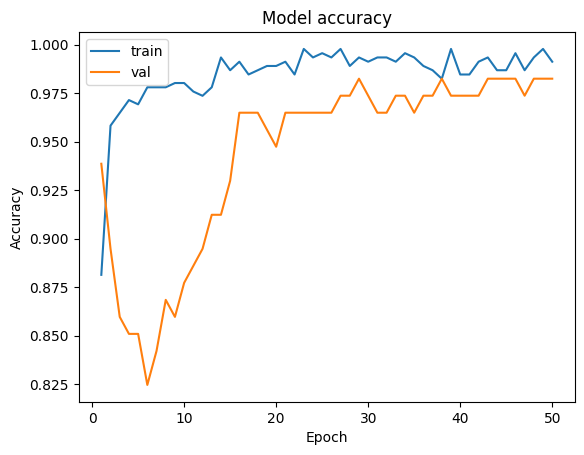

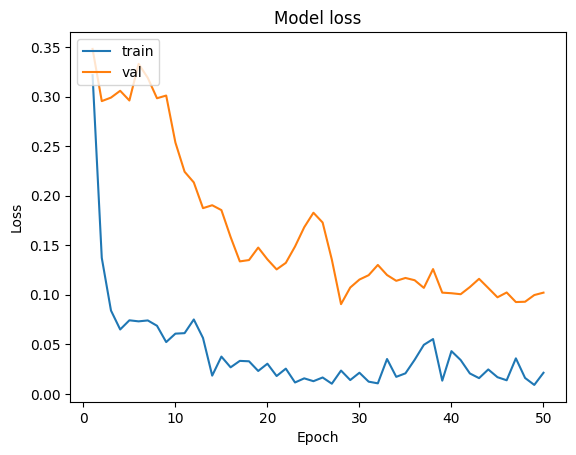

In [ ]:
plot_learningCurve(history,50)